# Regresión Logística usando bases de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
pima = pd.read_csv("Datasets/diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
pima.drop(0, axis=0, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Hay que seleccionar las variables **independientes** y la variable objetivo o **dependiente**.

In [5]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**test_size** determina el tamaño de la partición, resultando en 75% de la muestra original será usada para el entrenamiento, mientras que 25% será usado para la prueba.

**random_state** planta una semilla de numpy para la generación de numeros aleatorios para el proceso de selección en la partición.

In [7]:
# Creamos el modelo de regresión

logreg = LogisticRegression(random_state=0)

In [8]:
# Entrenamos el modelo

logreg.fit(X_train,y_train)

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Realizamos predicciones usando el grupo de prueba:

y_pred=logreg.predict(X_test)

In [10]:
# Evaluamos el modelo usando la matriz de confusión

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [11]:
x_plot=X_test.to_numpy()
x_plot.shape

(192, 7)

Text(0.5, 257.44, 'Predicted label')

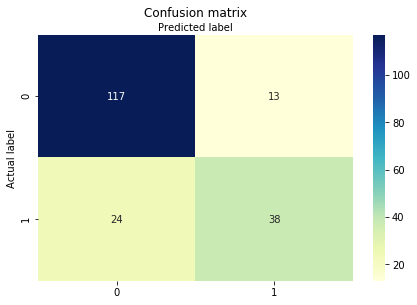

In [12]:
class_names=[0,1] # nombre de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creamos un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666


In [14]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba[:5]

array([0.95080369, 0.16134315, 0.10725547, 0.62628778, 0.12734974])

## Ejemplo 2

In [15]:
# Importamos las librerias

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [16]:
data=pd.read_csv("Datasets/bank.csv", header=0, sep=";")
print(data.shape)
print()
data.head()

(4521, 17)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [18]:
data.y=data.y.apply(lambda x:1 if x=="yes" else 0)
data[10:15]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,0
11,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,0
12,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,0
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,1
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,0


### Análisis exploratorio de los datos

En la muestra existen varias variables de tipo categóricas con más de 2 opciones:

In [19]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [20]:
data.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

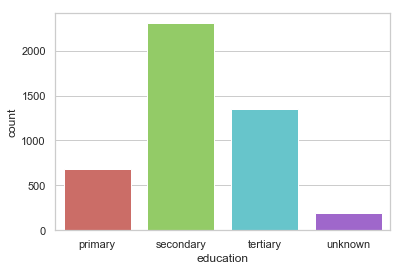

In [21]:
sns.countplot(x="education", data=data, palette="hls")
plt.show()

Para esta base de datos, la variable objetivo es la columna y. Esta hace referencia a si el cliente realizo una solicitud para una cuenta de deposito en el banco.

In [22]:
data.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

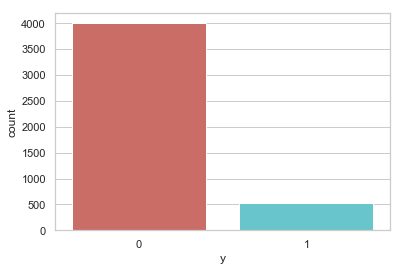

In [23]:
sns.countplot(x="y", data=data, palette="hls")
plt.show()

In [24]:
percentage=data.y.value_counts(normalize=True)
print(type(percentage))
print(percentage)

<class 'pandas.core.series.Series'>
0    0.88476
1    0.11524
Name: y, dtype: float64


In [25]:
data.groupby("y").mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [26]:
data.groupby("job").mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [27]:
data.groupby("marital").mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,0.139632


In [28]:
data.groupby("education").mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


In [29]:
tabla_job_y=pd.crosstab(data.job,data.y)
tabla_job_y

y,0,1
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


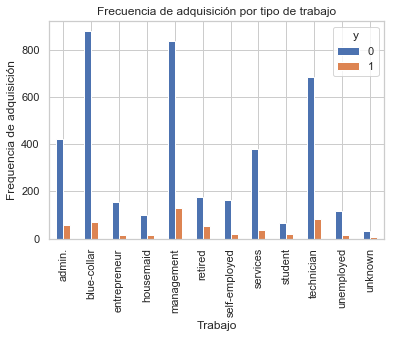

In [30]:
tabla_job_y.plot(kind='bar')
plt.title('Frecuencia de adquisición por tipo de trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Frequencia de adquisición')
plt.savefig('purchase_fre_job')
plt.show()

In [31]:
tabla_marital_y=pd.crosstab(data.marital,data.y)
tabla_marital_y

y,0,1
marital,,
divorced,451,77
married,2520,277
single,1029,167


In [32]:
# La siguiente tabla dividirá los elementos de la tabla anterior por la sumatoria de las filas
tabla_marital_y_pct=tabla_marital_y.div(tabla_marital_y.sum(1).astype(float), axis=0)
tabla_marital_y_pct

y,0,1
marital,,
divorced,0.854167,0.145833
married,0.900965,0.099035
single,0.860368,0.139632


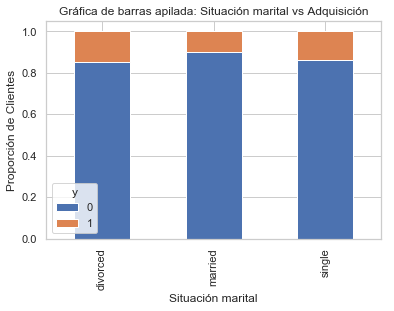

In [33]:
tabla_marital_y_pct.plot(kind='bar', stacked=True)
plt.title('Gráfica de barras apilada: Situación marital vs Adquisición')
plt.xlabel('Situación marital')
plt.ylabel('Proporción de Clientes')
plt.savefig('mariral_vs_pur_stack')

In [34]:
data.marital.name

'marital'

In [35]:
def grafica_normalizada(x,y,etiqueta_x=None, etiqueta_y=None):
    if etiqueta_x==None:
        x_label=x.name
    else:
        x_label=etiqueta_x
    if etiqueta_y==None:
        y_label=y.name
    else:
        y_label=etiqueta_y
    y_label
    tabla_temp=pd.crosstab(x,y)
    tabla_temp.div(tabla_temp.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    titulo="Gráfica de barras apilada:"+str(x_label)+" vs " + str(y_label)
    plt.title(titulo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(str(x_label)+"_vs_"+str(y_label)+"_stack")

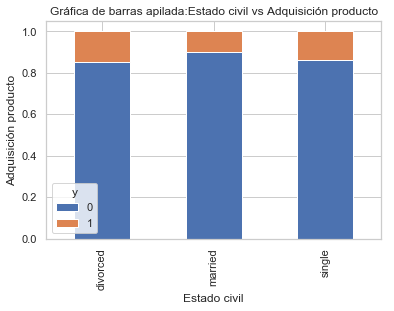

In [36]:
grafica_normalizada(data.marital,data.y, "Estado civil", "Adquisición producto")

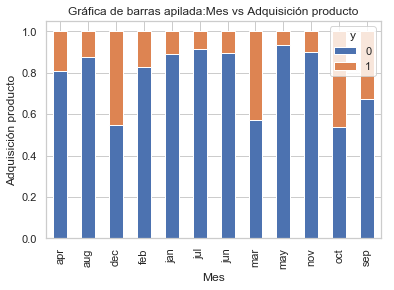

In [37]:
grafica_normalizada(data.month,data.y, "Mes", "Adquisición producto")

In [38]:
def grafica_barras(x,y,etiqueta_x=None, etiqueta_y=None):
    if etiqueta_x==None:
        x_label=x.name
    else:
        x_label=etiqueta_x
    if etiqueta_y==None:
        y_label=y.name
    else:
        y_label=etiqueta_y
    y_label
    tabla_temp=pd.crosstab(x,y)
    tabla_temp.plot(kind='bar')
    titulo="Gráfica de barras apilada:"+str(x_label)+" vs " + str(y_label)
    plt.title(titulo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(str(x_label)+"_vs_"+str(y_label)+"_stack")

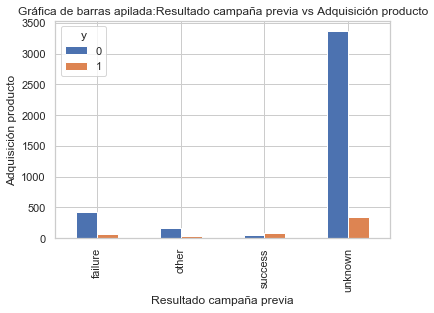

In [39]:
grafica_barras(data.poutcome,data.y, "Resultado campaña previa", "Adquisición producto")

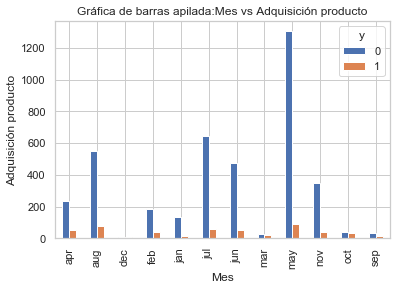

In [40]:
grafica_barras(data.month,data.y,"Mes","Adquisición producto")

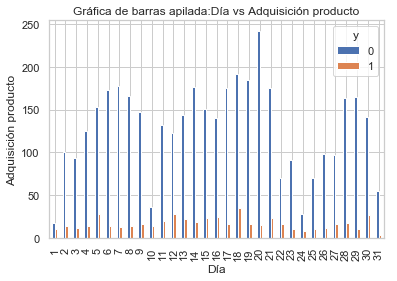

In [41]:
grafica_barras(data.day,data.y,"Día","Adquisición producto")

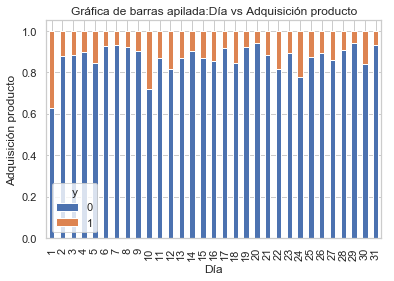

In [42]:
grafica_normalizada(data.day,data.y,"Día","Adquisición producto")

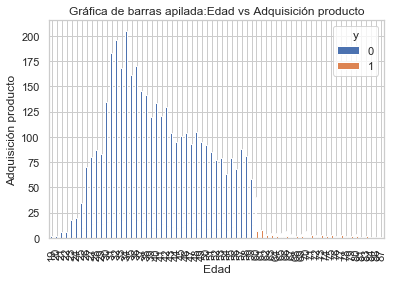

In [43]:
grafica_barras(data.age,data.y,"Edad","Adquisición producto")

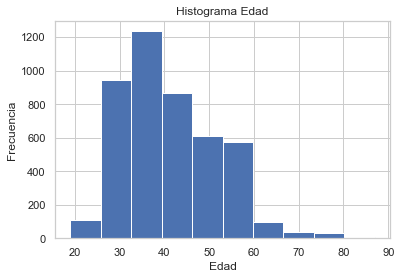

In [44]:
data.age.hist()
plt.title('Histograma Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('hist_age')
plt.show()

### Creando dummy variables

In [45]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [46]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [47]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_loose=[i for i in data_vars if i in cat_vars]

In [48]:
len(data_vars)

61

In [49]:
len(to_keep)

52

In [50]:
len(to_loose)

9

In [51]:
print(to_loose)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [52]:
data_final=data[to_keep]
data_final.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [53]:
data_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [54]:
bank_data=data_final.columns.values.tolist()

In [55]:
Y=["y"]
X=[v for v in bank_data if v not in Y]

### Selección de rasgos para el modelo

In [56]:
# Número de variables predictoras que esperamos usar
n=12

from sklearn import datasets
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
log_r = LogisticRegression(random_state=0)

In [58]:
X_scaled = preprocessing.scale(data_final[X])

In [59]:
rfe=RFE(log_r,n)
rfe=rfe.fit(X_scaled, data_final[Y].values.ravel())

In [60]:
# Las columnas que sean True son las que participarían del modelo
print(rfe.support_)

[False False False  True  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True False False False  True False
 False False False False  True  True  True  True  True  True False False
 False  True False]


In [61]:
print(rfe.ranking_)

[24 34  9  1  1 36 37 23 12 32 30 25  2 38 40 19 33 14 22 18  1 39 27 31
  3 16 20 28 21 10  1 11  7  8  1 17 35 29 15  6  1  1  1  1  1  1 13  5
 26  1  4]


In [62]:
print(bank_data)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [63]:
z=list(zip(bank_data,rfe.support_))
z

[('age', False),
 ('balance', False),
 ('day', False),
 ('duration', True),
 ('campaign', True),
 ('pdays', False),
 ('previous', False),
 ('y', False),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('job_housemaid', False),
 ('job_management', False),
 ('job_retired', False),
 ('job_self-employed', False),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', False),
 ('job_unemployed', False),
 ('job_unknown', False),
 ('marital_divorced', True),
 ('marital_married', False),
 ('marital_single', False),
 ('education_primary', False),
 ('education_secondary', False),
 ('education_tertiary', False),
 ('education_unknown', False),
 ('default_no', False),
 ('default_yes', False),
 ('housing_no', False),
 ('housing_yes', True),
 ('loan_no', False),
 ('loan_yes', False),
 ('contact_cellular', False),
 ('contact_telephone', True),
 ('contact_unknown', False),
 ('month_apr', False),
 ('month_aug', False),
 ('month_dec', False),
 ('month_f

In [64]:
x_cols=[]
for i in range(len(z)):
    if((z[i][1])==True):
        x_cols.append(z[i][0])        
print(len(x_cols))
print(x_cols)

12
['duration', 'campaign', 'marital_divorced', 'housing_yes', 'contact_telephone', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'poutcome_other']


In [65]:
X=data_final[x_cols]
Y=data_final.y

### Implementado el modelo

La librería de **statsmodels** nos permite crear un modelo de regresión logística que si incluye una tabla de resultados *(summary)* con respecto a la calidad del modelo. Es recomendable utilizar stasmodel como primer acercamiento y ya una vez que el modelo es representativo, hacer predicciones a partir del modelo en **scikit-learn**

In [66]:
import statsmodels.api as sm

In [67]:
logit_model=sm.Logit(Y,X)

In [68]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.316249
         Iterations 8


In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4509
Method:                           MLE   Df Model:                           11
Date:                Fri, 13 Mar 2020   Pseudo R-squ.:                  0.1150
Time:                        17:00:57   Log-Likelihood:                -1429.8
converged:                       True   LL-Null:                       -1615.5
                                        LLR p-value:                 6.875e-73
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
duration              0.0028      0.000     16.420      0.000       0.002       0.003
campaign             -0.5354      0.032    -16.551      0.000      -0.599      -0.472
marital_divorced     -0.0462      0.150     -0.309      0.757      -0.339       0.247
housing_yes          -1.0718      0.104    -10.330      0.000      -1.275      -0.868
contact_telephone    -0.2158      0.201     -1.074      0.283      -0.610       0.178
month_jan            -1.8419      0.300     -6.138      0.000      -2.430      -1.254
month_jul            -1.5934      0.157    -10.138      0.000      -1.901      -1.285
month_jun            -1.6312      0.169     -9.648      0.000      -1.963      -1.300
month_mar             0.6264      0.330      1.900      0.057      -0.020       1.273
month_may            -1.7484      0.141    -12.425      0.000      -2.024      -1.473
month_nov            -1.7634      0.193     -9.123      0.000      -2.142      -1.385
poutcome_other        0.2865      0.217      1.320      0.187      -0.139       0.712
=====================================================================================
"""

In [70]:
from sklearn import linear_model

In [71]:
logit_model2=linear_model.LogisticRegression()
logit_model2.fit(X,Y)

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
logit_model2.score(X,Y)

0.8898473788984738

In [73]:
# El promedio nos da un valor aproximado de la cantidad de gente que adquiere el producto
Y.mean()

0.11523999115239991

In [74]:
logit_model2.coef_

array([[ 0.00384369, -0.10089301,  0.33594693, -0.51820587,  0.36597216,
        -0.68149336, -1.03646498, -0.77579028,  1.15740938, -1.22364596,
        -0.99993037,  0.71083992]])

In [75]:
X.columns

Index(['duration', 'campaign', 'marital_divorced', 'housing_yes',
       'contact_telephone', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'poutcome_other'],
      dtype='object')

In [76]:
print(logit_model2.coef_.shape) ; print(X.columns.shape)

(1, 12)
(12,)


In [77]:
list(zip(X.columns, np.transpose(logit_model2.coef_)))

[('duration', array([0.00384369])),
 ('campaign', array([-0.10089301])),
 ('marital_divorced', array([0.33594693])),
 ('housing_yes', array([-0.51820587])),
 ('contact_telephone', array([0.36597216])),
 ('month_jan', array([-0.68149336])),
 ('month_jul', array([-1.03646498])),
 ('month_jun', array([-0.77579028])),
 ('month_mar', array([1.15740938])),
 ('month_may', array([-1.22364596])),
 ('month_nov', array([-0.99993037])),
 ('poutcome_other', array([0.71083992]))]

In [78]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model2.coef_))))

,0,1
0,duration,[0.0038436931846450293]
1,campaign,[-0.10089300821617057]
2,marital_divorced,[0.33594693167673934]
3,housing_yes,[-0.5182058736985515]
4,contact_telephone,[0.36597216398152077]
5,month_jan,[-0.6814933637385282]
6,month_jul,[-1.0364649802513828]
7,month_jun,[-0.7757902840845997]
8,month_mar,[1.1574093793180102]
9,month_may,[-1.2236459626273353]


## Validación cruzada

El modelo de validación cruzada empleado será el de k-fold, con un valor de k=15

In [80]:
from sklearn.model_selection import cross_val_score

In [85]:
scores=cross_val_score(linear_model.LogisticRegression(), X,Y,scoring="accuracy", cv=15)

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

In [86]:
scores

array([0.89735099, 0.89072848, 0.88741722, 0.85761589, 0.89072848,
       0.89735099, 0.88704319, 0.89036545, 0.89368771, 0.88372093,
       0.88039867, 0.91362126, 0.90033223, 0.87375415, 0.89368771])

In [88]:
# Promedio del total de las iteraciones
scores.mean()

0.8891868899107463

## Matriz de confusión y las curvas ROC

* Número de positivos reales= Verdadero positivos + Falsos negativos

* Número de negativos reales= Verdadero negativos + Falsos positivos

* Número de predicciones correctas= Verdadero positivos + Verdadero negativos

* Número de positivos reales= Falsos positivos + Falsos negativos

A partir de esos 4 parámetros se calculan los valores de sensibilidad y especifidad:

* $Sensibilidad(TPR)=\frac{Verdadero\ positivo}{Total\ Positivos\ reales}$



* $Especifidad(TNR)=\frac{Verdadero\ negativo}{Total\ Negativos\ reales}$

In [89]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [90]:
lm=linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
probs=lm.predict_proba(X_test)

In [95]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
treshold=0.1
prob_df["prediction"]=np.where(prob_df[0]>=treshold,1,0)
prob_df["actual"]=list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.058037,0,0
1,0.023461,0,0
2,0.319206,1,0
3,0.033837,0,0
4,0.033054,0,0


In [96]:
confusion_matrix=pd.crosstab(prob_df.prediction, prob_df.actual)

In [97]:
confusion_matrix

actual,0,1
prediction,,
0,894,36
1,296,131


In [106]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [107]:
sensitivity=TP/(TP+FN)
sensitivity

0.47305389221556887

In [108]:
specifity=TN/(TN+FP)
1-specifity

0.06302521008403361

### Calcularemos varios factores de sensibilidad y de especifidad mediante valores diferentes para el treshold

In [124]:
tresholds=[0.04, 0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25]

# Creamos 2 listas con valores de inicio igual a 1, para que sea el punto de partida de la gráfica ROC
sensitivities=[1]
specifities=[1]


for t in tresholds:
    prob_df["prediction"]=np.where(prob_df[0]>=t,1,0)
    prob_df["actual"]=list(Y_test)
    prob_df.head()
    confusion_matrix=pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    sensitivity=TP/(TP+FN)
    sensitivities.append(sensitivity)
    specifity=TN/(TN+FP)
    specifity=1-specifity
    specifities.append(specifity)

# Agregamos 2 valores de término igual a 0, para que sea el punto final de la gráfica ROC
sensitivities.append(0)
specifities.append(0)

In [125]:
sensitivities

[1,
 0.9580838323353293,
 0.9221556886227545,
 0.8862275449101796,
 0.7844311377245509,
 0.7425149700598802,
 0.6467065868263473,
 0.5808383233532934,
 0.5389221556886228,
 0.47305389221556887,
 0]

In [126]:
specifities

[1,
 0.5882352941176471,
 0.49411764705882355,
 0.35546218487394954,
 0.24873949579831933,
 0.1983193277310924,
 0.13781512605042012,
 0.09747899159663864,
 0.08319327731092441,
 0.06302521008403361,
 0]

In [127]:
import matplotlib.pyplot as plt

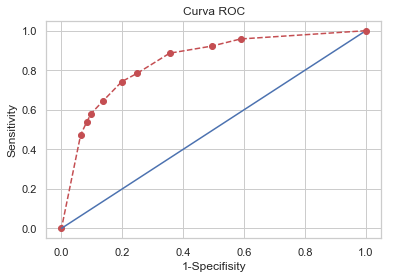

In [129]:
# Valores para la recta del gráfico

x_roc=[i*0.01 for i in range(100)]
y_roc=[i*0.01 for i in range(100)]


plt.plot(specifities,sensitivities, marker="o", linestyle="--", color="r")
plt.plot(x_roc,y_roc)
plt.xlabel("1-Specifisity")
plt.ylabel("Sensitivity")
plt.title("Curva ROC")
plt.show()